In [ ]:
!nvidia-smi

Tue Mar 23 08:56:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
df = pd.read_excel("/content/150test.xlsx", names=['Text', 'Polarity', 'Final Polarity', 'Subjectivity', 'Final Subjectivity'])
#df.set_index('i', inplace=True)

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.SMILEY)

def preprocessing(tweet):
    tweet = p.clean(tweet)
    return tweet

df['Text'] = df['Text'].apply(lambda x: preprocessing(x))

In [ ]:
df['Text'].isnull().sum()

0

In [ ]:
df = pd.read_excel("/content/test annotated.xlsx")

In [ ]:
df.head()

,Text,Polarity,Final Polarity,Subjectivity,Final Subjectivity
0,Jaylen Chili' Brown NBA Leader: 26.9 PPG Turbo...,0.0,0.0,0.00,0.00
1,Top 5 basketball players of all time 1. LeBron...,0.2,0.2,0.75,0.75
2,"Do yall not know, Kareem Abdul-Jabbar, Wilt Ch...",0.0,0.0,0.00,0.00
3,Gotta go with Kareem Abdul-Jabbar in 'Airplane!',0.0,0.0,0.00,0.00
4,NBA legend Kareem Abdul-Jabbar urges black com...,0.0,0.0,0.43,0.43


In [ ]:
def label2(df):
  if (df['Subjectivity']>=0) and (df['Subjectivity']<0.2):
    return 0
  elif (df['Subjectivity']>=0.2) and (df['Subjectivity']<0.4):
    return 1
  elif (df['Subjectivity']>=0.4) and (df['Subjectivity']<0.6):
    return 2
  elif (df['Subjectivity']>=0.6) and (df['Subjectivity']<0.8):
    return 3
  elif (df['Subjectivity']>=0.8) and (df['Subjectivity']<=1):
    return 4

In [ ]:
def label3(df):
  if (df['Final Subjectivity']>=0) and (df['Final Subjectivity']<0.2):
    return 0
  elif (df['Final Subjectivity']>=0.2) and (df['Final Subjectivity']<0.4):
    return 1
  elif (df['Final Subjectivity']>=0.4) and (df['Final Subjectivity']<0.6):
    return 2
  elif (df['Final Subjectivity']>=0.6) and (df['Final Subjectivity']<0.8):
    return 3
  elif (df['Final Subjectivity']>=0.8) and (df['Final Subjectivity']<=1):
    return 4

In [ ]:
def label0(df):
  if (df['Polarity']==0):
    return 0
  elif (df['Polarity']>0) and (df['Polarity']<0.5):
    return 1
  elif (df['Polarity']>=0.5) and (df['Polarity']<=1):
    return 2
  elif (df['Polarity']<0) and (df['Polarity']>=-0.5):
    return 3
  elif (df['Polarity']<-0.5) and (df['Polarity']>=-1):
    return 4

In [ ]:
def label1(df):
  if (df['Final Polarity']==0):
    return 0
  elif (df['Final Polarity']>0) and (df['Final Polarity']<0.5):
    return 1
  elif (df['Final Polarity']>=0.5) and (df['Final Polarity']<=1):
    return 2
  elif (df['Final Polarity']<0) and (df['Final Polarity']>-0.5):
    return 3
  elif (df['Final Polarity']<=-0.5) and (df['Final Polarity']>=-1):
    return 4

In [ ]:
def label4(df):
  if (df['Polarity']==0):
    return 'Neutral'
  elif (df['Polarity']>0) and (df['Polarity']<0.5):
    return 'Positive'
  elif (df['Polarity']>=0.5) and (df['Polarity']<=1):
    return 'Very Positive'
  elif (df['Polarity']<0) and (df['Polarity']>-0.5):
    return 'Negative'
  elif (df['Polarity']<-0.5) and (df['Polarity']>=-1):
    return 'Very Negative'

In [ ]:
def label1(df):
  if (df['Subjectivity']>=0) and (df['Subjectivity']<0.2):
    return 'zero'
  elif (df['Subjectivity']>=0.2) and (df['Subjectivity']<0.4):
    return 'one'
  elif (df['Subjectivity']>=0.4) and (df['Subjectivity']<0.6):
    return 'two'
  elif (df['Subjectivity']>=0.6) and (df['Subjectivity']<0.8):
    return 'three'
  elif (df['Subjectivity']>=0.8) and (df['Subjectivity']<=1):
    return 'four'

In [ ]:
df['label0'] = df.apply(label0, axis=1)
df['label1'] = df.apply(label1, axis=1)
df['label2'] = df.apply(label2, axis=1)
df['label3'] = df.apply(label3, axis=1)

In [ ]:
df['label0'] = df.apply(label0, axis=1)
df['label2'] = df.apply(label2, axis=1)

In [ ]:
df['label1'] = df.apply(label1, axis=1)

In [ ]:
df.to_excel('Train 1k diff.xlsx')

In [ ]:
df['Polarity Class'] = df.apply(label4, axis=1)

In [ ]:
df['PolarityC'] = df.apply(label4, axis=1)

In [ ]:
df['SubjectivityC'] = df.apply(label1, axis=1)

In [ ]:
df.to_excel('Train.xlsx')

In [ ]:
df['Subjectivity Class'] = df.apply(label1, axis=1)

In [ ]:
df.label1.value_counts()

0    70
2    29
1    25
3    15
4     9
Name: label1, dtype: int64

In [ ]:
df.PolarityC.value_counts()

Neutral          519
Positive         170
Negative         138
Very Positive     97
Very Negative     76
Name: PolarityC, dtype: int64

In [ ]:
df.label2.value_counts()

0    516
2    173
1    138
3    108
4     65
Name: label2, dtype: int64

In [ ]:
df.SubjectivityC.value_counts()

zero     528
two      173
one      116
three    103
four      80
Name: SubjectivityC, dtype: int64

In [ ]:
df.to_excel('r1.xlsx')

In [ ]:
df.to_excel('test 1k class.xlsx')

In [ ]:
label_dict = dict({0: '0', 1: '1', 2: '2',3: '3', 4:'4' })

In [ ]:
possible_labels = df.label4.unique()

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
df['label'] = df.cat.replace(label_dict)

In [ ]:
#df['label'] = df['c']

In [ ]:
df['label3'] = df['label3'].fillna(0)

In [ ]:
df.astype({'label4': 'int64'}).dtypes

Text                    object
Final Polarity         float64
label4                   int64
Polarity Prediction      int64
dtype: object

In [ ]:
df.head(50)

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
df['Text'] = df['Text'].fillna('abc')

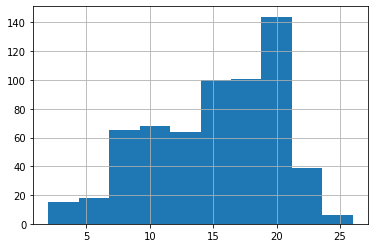

In [ ]:

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in df.Text]

pd.Series(seq_len).hist(bins = 10)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    df.Text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=28, 
    return_tensors='pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df.label1.values)


In [ ]:
labels_train = labels_train.to(dtype=torch.long)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)

In [ ]:

len(dataset_train)

148

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=5,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#23/3/21

from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train,  
                              batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:

epochs = 30

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np

In [ ]:
#original
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
#prf
def precision_score_func(labels, preds):
  labels_flat = labels.flatten()
  preds_flat = np.argmax(preds, axis=1).flatten()
  return precision_score(labels_flat, preds_flat, average='weighted')

def recall_score_func(labels, preds):
  labels_flat = labels.flatten()
  preds_flat = np.argmax(preds, axis=1).flatten()
  return recall_score(labels_flat, preds_flat, average='weighted')

def f1_score_func(labels, preds):
  preds_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return f1_score(labels_flat, preds_flat, average='weighted')


In [ ]:
#def c_precision_score_func(labels, preds):
  #labels_flat = labels.flatten()
  #preds_flat = np.argmax(preds, axis=1).flatten()
  return precision_score(labels, preds, average=None, zero_division=1)

#def c_recall_score_func(labels, preds):
  #labels_flat = labels.flatten()
  #preds_flat = np.argmax(preds, axis=1).flatten()
  return recall_score(labels, preds, average=None, zero_division=1)

#def c_f1_score_func(labels, preds):
  #preds_flat = np.argmax(preds, axis=1).flatten()
  #labels_flat = labels.flatten()
  return f1_score(labels, preds, average=None, zero_division=1)


In [ ]:
label_dict

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}

In [ ]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 44
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
#CUDA_LAUNCH_BLOCKING=1

In [ ]:
def evaluate(dataloader_train):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_train:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_train_avg = loss_val_total/len(dataloader_train) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_train_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)             
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    train_loss, predictions, true_vals = evaluate(dataloader_train)
    #train_f1 = f1_score_func(predictions, true_vals)
    train_precision = precision_score_func(true_vals, predictions)
    train_recall = recall_score_func(true_vals, predictions)
    train_f1 = f1_score_func(true_vals, predictions)
    tqdm.write(f'Train loss: {train_loss}')
    tqdm.write(f'Precision Score (weighted): {train_precision}')
    tqdm.write(f'Recall Score (Weighted): {train_recall}')
    tqdm.write(f'F1 Score (Weighted): {train_f1}')


Epoch 1
Training loss: 1.479539954662323
Train loss: 1.318707811832428
Precision Score (weighted): 0.5452673477624885
Recall Score (Weighted): 0.47419354838709676
F1 Score (Weighted): 0.37782253662502235


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 2
Training loss: 1.258765459060669
Train loss: 1.1134946525096894
Precision Score (weighted): 0.6060427124717526
Recall Score (Weighted): 0.5919354838709677
F1 Score (Weighted): 0.5208418064734791



Epoch 3
Training loss: 1.120673507452011
Train loss: 0.9622733533382416
Precision Score (weighted): 0.7066773828255312
Recall Score (Weighted): 0.6838709677419355
F1 Score (Weighted): 0.6176008762857399



Epoch 4
Training loss: 0.9587431311607361
Train loss: 0.756573149561882
Precision Score (weighted): 0.7400557804740797
Recall Score (Weighted): 0.7564516129032258
F1 Score (Weighted): 0.7159875907327495



Epoch 5
Training loss: 0.7709646821022034
Train loss: 0.6183830663561821
Precision Score (weighted): 0.7652517863509558
Recall Score (Weighted): 0.7887096774193548
F1 Score (Weighted): 0.7500826640020103



Epoch 6
Training loss: 0.6399037539958954
Train loss: 0.5116480231285095
Precision Score (weighted): 0.8227184891872613
Recall Score (Weighted): 0.8516129032258064
F1 Score (Weighted): 0.8309323907527698



Epoch 7
Training loss: 0.5262472257018089
Train loss: 0.39297997355461123
Precision Score (weighted): 0.8641792936789463
Recall Score (Weighted): 0.8935483870967742
F1 Score (Weighted): 0.8768486047690964



Epoch 8
Training loss: 0.4030265316367149
Train loss: 0.2791435144841671
Precision Score (weighted): 0.9160949231631279
Recall Score (Weighted): 0.9451612903225807
F1 Score (Weighted): 0.9302256535726164



Epoch 9
Training loss: 0.308698994666338
Train loss: 0.21555488891899585
Precision Score (weighted): 0.9218843165508928
Recall Score (Weighted): 0.95
F1 Score (Weighted): 0.9353398883574406



Epoch 10
Training loss: 0.237454080209136
Train loss: 0.16949814967811108
Precision Score (weighted): 0.931927782826828
Recall Score (Weighted): 0.9596774193548387
F1 Score (Weighted): 0.9449862545768261



Epoch 11
Training loss: 0.17643356919288636
Train loss: 0.12218754980713128
Precision Score (weighted): 0.9696328959915819
Recall Score (Weighted): 0.964516129032258
F1 Score (Weighted): 0.9560206597414125



Epoch 12
Training loss: 0.15128851030021906
Train loss: 0.09947963524609804
Precision Score (weighted): 0.9782372256429727
Recall Score (Weighted): 0.9741935483870968
F1 Score (Weighted): 0.9703608076022135



Epoch 13
Training loss: 0.10300020053982735
Train loss: 0.07213795762509108
Precision Score (weighted): 0.987827767400676
Recall Score (Weighted): 0.9870967741935484
F1 Score (Weighted): 0.9864702927440119



Epoch 14
Training loss: 0.08343550115823746
Train loss: 0.0686438899487257
Precision Score (weighted): 0.9905788735863242
Recall Score (Weighted): 0.9903225806451613
F1 Score (Weighted): 0.9902068432546085



Epoch 15
Training loss: 0.06720320405438543
Train loss: 0.04357187859714031
Precision Score (weighted): 0.9935847386889636
Recall Score (Weighted): 0.9935483870967742
F1 Score (Weighted): 0.9935331166108894



Epoch 16
Training loss: 0.050678151892498136
Train loss: 0.032510593091137706
Precision Score (weighted): 0.9951910212576186
Recall Score (Weighted): 0.9951612903225806
F1 Score (Weighted): 0.9951452887306498



Epoch 17
Training loss: 0.0390424482524395
Train loss: 0.02742421571165323
Precision Score (weighted): 0.99519764191477
Recall Score (Weighted): 0.9951612903225806
F1 Score (Weighted): 0.9951569817986878



Epoch 18
Training loss: 0.03065200001001358
Train loss: 0.0218442942481488
Precision Score (weighted): 0.996803924483425
Recall Score (Weighted): 0.9967741935483871
F1 Score (Weighted): 0.9967691539184481



Epoch 19
Training loss: 0.03091332921758294
Train loss: 0.021054644789546727
Precision Score (weighted): 0.996803924483425
Recall Score (Weighted): 0.9967741935483871
F1 Score (Weighted): 0.9967691539184481



Epoch 20
Training loss: 0.02498840361367911
Train loss: 0.018596219504252075
Precision Score (weighted): 0.996803924483425
Recall Score (Weighted): 0.9967741935483871
F1 Score (Weighted): 0.9967691539184481



Epoch 21
Training loss: 0.021889969427138566
Train loss: 0.01590105826035142
Precision Score (weighted): 0.996803924483425
Recall Score (Weighted): 0.9967741935483871
F1 Score (Weighted): 0.9967691539184481



Epoch 22
Training loss: 0.02383340122178197
Train loss: 0.013643554924055935
Precision Score (weighted): 0.996803924483425
Recall Score (Weighted): 0.9967741935483871
F1 Score (Weighted): 0.9967691539184481



Epoch 23
Training loss: 0.015498129511252045
Train loss: 0.011296310951001943
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 24
Training loss: 0.014284224761649967
Train loss: 0.010281461337581278
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 25
Training loss: 0.012129624956287444
Train loss: 0.009214662795420736
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 26
Training loss: 0.012593929562717677
Train loss: 0.00898058150196448
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 27
Training loss: 0.011418663035146891
Train loss: 0.009360196895431726
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 28
Training loss: 0.012824322236701846
Train loss: 0.0091918108984828
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 29
Training loss: 0.011386363627389073
Train loss: 0.009209285688120872
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



Epoch 30
Training loss: 0.01210494798142463
Train loss: 0.009009033592883497
Precision Score (weighted): 0.9983945639187574
Recall Score (Weighted): 0.9983870967741936
F1 Score (Weighted): 0.9983861774016148



In [ ]:
torch.cuda.empty_cache()

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
model.load_state_dict(torch.load('/content/finetuned_BERT_epoch_29.model', map_location=torch.device('cuda')))

<All keys matched successfully>

In [ ]:
model.to(device)

In [ ]:
_, predictions, true_vals = evaluate(dataloader_train)

In [ ]:
true_vals

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
model = model.to(device)


In [ ]:
preds_flat = np.argmax(predictions, axis=1).flatten()
preds_flat

array([0, 1, 0, 2, 0, 3, 3, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 4, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 3, 1, 0,
       2, 1, 2, 4, 0, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2])

In [ ]:
df['Polarity Prediction'] = preds_flat.tolist()


In [ ]:
#flat_true_vals =  np.argmax(true_vals, axis=1).flatten()
df['True val'] = true_vals.tolist()

In [ ]:
df.head(50)

In [ ]:
df.to_excel('test polarity 150 predictions-2.xlsx')

In [ ]:
accuracy_per_class(predictions, true_vals)

In [ ]:
test_precision = precision_score_func(true_vals, predictions)
test_recall = recall_score_func(true_vals, predictions)
test_f1 = f1_score_func(true_vals, predictions)

print(test_precision)
print(test_recall)
print(test_f1)

0.9951694269940986
0.9951456310679612
0.9946661577729541


In [ ]:
from sklearn import metrics

In [ ]:
y_true = true_vals.flatten()
y_pred = np.argmax(predictions, axis=1).flatten()
print(metrics.confusion_matrix(y_true, y_pred))
print(metrics.classification_report(y_true, y_pred, digits=2))

[[44 19  0  7  0]
 [ 3 12 10  0  0]
 [ 1 13 13  2  0]
 [ 3  3  1  8  0]
 [ 1  3  0  3  2]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        70
           1       0.24      0.48      0.32        25
           2       0.54      0.45      0.49        29
           3       0.40      0.53      0.46        15
           4       1.00      0.22      0.36         9

    accuracy                           0.53       148
   macro avg       0.61      0.46      0.47       148
weighted avg       0.65      0.53      0.56       148

